In [1]:
!wget https://github.com/p-p-p-p/Spectral-Data-Analysis/raw/refs/heads/main/spectral_data.csv

--2024-11-28 11:29:50--  https://github.com/p-p-p-p/Spectral-Data-Analysis/raw/refs/heads/main/spectral_data.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/p-p-p-p/Spectral-Data-Analysis/refs/heads/main/spectral_data.csv [following]
--2024-11-28 11:29:51--  https://raw.githubusercontent.com/p-p-p-p/Spectral-Data-Analysis/refs/heads/main/spectral_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7920826 (7.6M) [text/plain]
Saving to: ‘spectral_data.csv’

spectral_data.csv   100%[===================>]   7.55M  --.-KB/s    in 0.1s    

2024-11-28 11:29:51 (69.3 MB/s) - ‘spectral_data.cs

## 1. Load and Explore the Dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("spectral_data.csv")

# Preview the dataset
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Columns: 2153 entries, 0 to is_fresh
dtypes: float64(2151), int64(1), object(1)
memory usage: 10.2+ MB
None


,0,1,2,3,4,5,6,7,8,9,...,2143,2144,2145,2146,2147,2148,2149,2150,fruit_name,is_fresh
0,0.213,0.203,0.194,0.193,0.192,0.189,0.196,0.182,0.171,0.179,...,0.261,0.257,0.252,0.253,0.255,0.259,0.268,0.273,avocado,0
1,0.140,0.145,0.147,0.143,0.139,0.138,0.140,0.130,0.121,0.122,...,0.184,0.188,0.189,0.183,0.177,0.174,0.177,0.193,avocado,0
2,0.156,0.154,0.141,0.127,0.132,0.150,0.152,0.140,0.131,0.134,...,0.157,0.158,0.163,0.170,0.164,0.156,0.150,0.143,avocado,0
3,0.221,0.210,0.217,0.209,0.199,0.197,0.198,0.189,0.180,0.179,...,0.282,0.280,0.272,0.275,0.277,0.278,0.286,0.288,avocado,0
4,0.252,0.253,0.235,0.234,0.238,0.242,0.251,0.235,0.214,0.206,...,0.223,0.219,0.221,0.221,0.217,0.222,0.227,0.234,avocado,0


## 2. Preprocess the Data
a. Normalize Spectral Data<br>
Normalize the reflectance values (columns 0–2150) to bring them to a comparable scale.

In [4]:

# Extract spectral columns
spectral_data = data.iloc[:, 0:2151]

# Normalize spectral data
scaler = MinMaxScaler()
normalized_spectral_data = scaler.fit_transform(spectral_data)

# Replace original spectral data with normalized data
data.iloc[:, 0:2151] = normalized_spectral_data


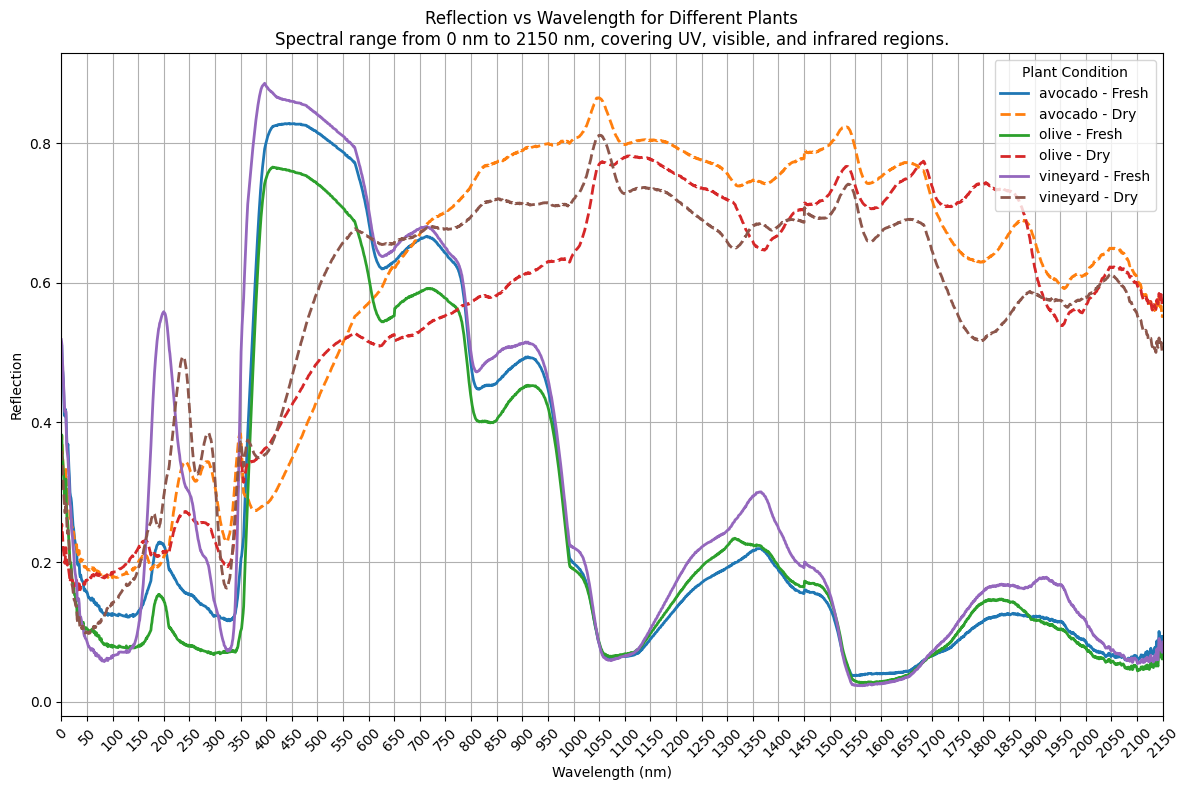

In [5]:
#@title Reflection vs Wavelength
# Function to plot reflection vs wavelength for fresh and dry samples based on a given wavelength range for different plants
def plot_spectral_data_by_range(df, wavelength_range_key):
    # Get the wavelength range from the dictionary based on the key provided
    range_info = wavelength_ranges[wavelength_range_key]
    wavelength_start = range_info["start"]
    wavelength_end = range_info["end"]

    # Description for the plot title
    description = range_info["description"]

    # Assuming the first columns correspond to wavelengths, and the last two columns are 'fruit_name' and 'is_fresh'
    wavelength_columns = df.columns[:-2]  # Exclude 'fruit_name' and 'is_fresh'

    # Directly slice the columns from 'wavelength_start' to 'wavelength_end'
    valid_columns = wavelength_columns[wavelength_start:wavelength_end + 1]

    # Slice the dataframe to match the desired range of wavelengths
    df_wavelength_range = df.loc[:, valid_columns]

    # Create a figure for plotting
    plt.figure(figsize=(12, 8))

    # Loop through each unique fruit name
    for fruit in df['fruit_name'].unique():
        # Filter the data for the current fruit
        fruit_data = df[df['fruit_name'] == fruit]

        # Separate fresh and dry samples for the current fruit
        fresh_data = fruit_data[fruit_data['is_fresh'] == 1]  # Fresh samples
        dry_data = fruit_data[fruit_data['is_fresh'] == 0]    # Dry samples

        # Calculate the average reflection for fresh and dry samples
        fresh_reflection = fresh_data[valid_columns].mean(axis=0)
        dry_reflection = dry_data[valid_columns].mean(axis=0)

        # Plot reflection vs wavelength for fresh and dry samples for the current fruit
        plt.plot(valid_columns, fresh_reflection, label=f"{fruit} - Fresh", linestyle='-', linewidth=2)
        plt.plot(valid_columns, dry_reflection, label=f"{fruit} - Dry", linestyle='--', linewidth=2)

    # Add titles and labels
    # plt.title(f"Reflection vs Wavelength for Different Plants ({wavelength_range_key})\n Range: {wavelength_start}nm - {wavelength_end}nm\n{description}")
    plt.title(f"Reflection vs Wavelength for Different Plants\n{description}")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Reflection")

    # Set the x-axis limits to match the wavelength range of interest
    plt.xlim(valid_columns[0], valid_columns[-1])

    # Skip every 50th point for better readability
    step = 50  # Skip every 50th point
    x_ticks = valid_columns[::step]  # Select every 50th wavelength
    plt.xticks(x_ticks, rotation=45)  # Set the x-ticks with the selected wavelengths

    # Add grid and ensure everything fits
    plt.grid(True)
    plt.tight_layout()

    # Add legend
    plt.legend(title="Plant Condition", loc='upper right')

    # Show the plot
    plt.show()


# Wavelength ranges dictionary
wavelength_ranges = {
    "All Spectral Data": {
        "start": 0,
        "end": 2150,
        "description": "Spectral range from 0 nm to 2150 nm, covering UV, visible, and infrared regions."
    },
}

# Run the function for all spectral data
for key in wavelength_ranges:
    plot_spectral_data_by_range(data, key)


1. Vegetation Indices Comparison (NDVI)<br>
We can calculate NDVI and compare it across all plant types (fruits).

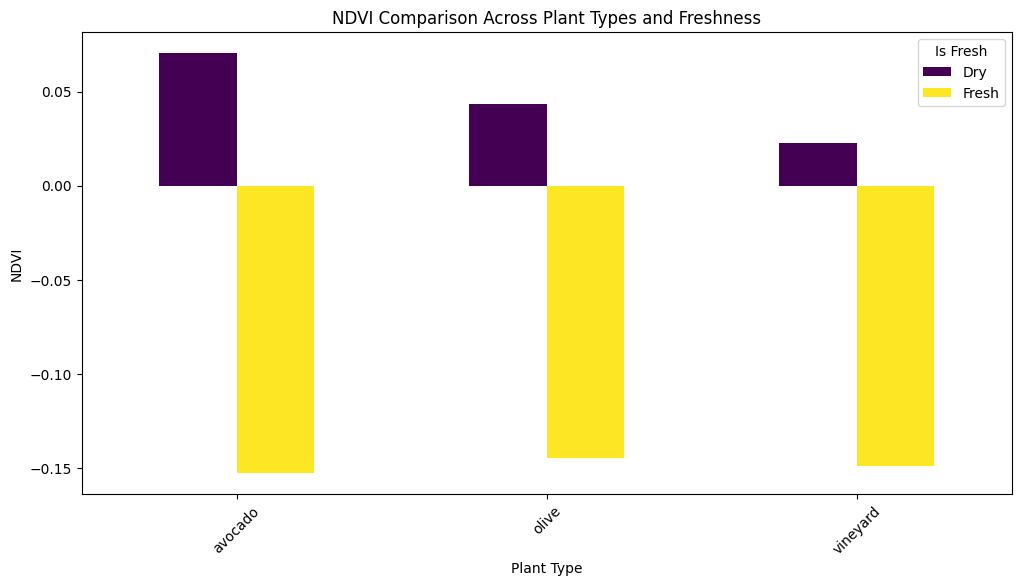

In [6]:
# Calculate NDVI
data['NDVI'] = (data['800'] - data['680']) / (data['800'] + data['680'])

# Group NDVI by fruit type and freshness
ndvi_means = data.groupby(['fruit_name', 'is_fresh'])['NDVI'].mean().unstack()

# Plot NDVI for all fruits (grouped bar chart)
ndvi_means.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('NDVI Comparison Across Plant Types and Freshness')
plt.ylabel('NDVI')
plt.xlabel('Plant Type')
plt.xticks(rotation=45)
plt.legend(title='Is Fresh', labels=['Dry', 'Fresh'])
plt.show()


2. Water Content Analysis Comparison <br>
Compare water reflectance values (970 nm, 1450 nm, and 1950 nm) for all fruits.

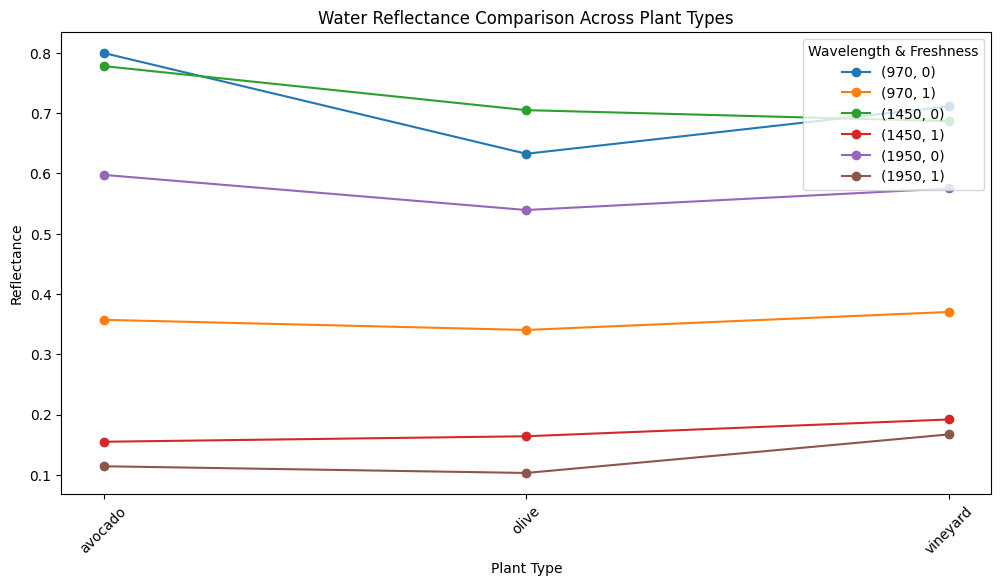

In [7]:
# Group water content by fruit type and freshness
water_means = data.groupby(['fruit_name', 'is_fresh'])[['970', '1450', '1950']].mean()

# Plot water reflectance as a line plot for each fruit type
water_means.unstack().plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Water Reflectance Comparison Across Plant Types')
plt.ylabel('Reflectance')
plt.xlabel('Plant Type')
plt.xticks(range(len(data['fruit_name'].unique())), data['fruit_name'].unique(), rotation=45)
plt.legend(title='Wavelength & Freshness', loc='upper right')
plt.show()


3. Chlorophyll Content Estimation Comparison<br>
Chlorophyll reflects strongly in blue (450 nm) and red (680 nm). We can average these values and compare across fruits.

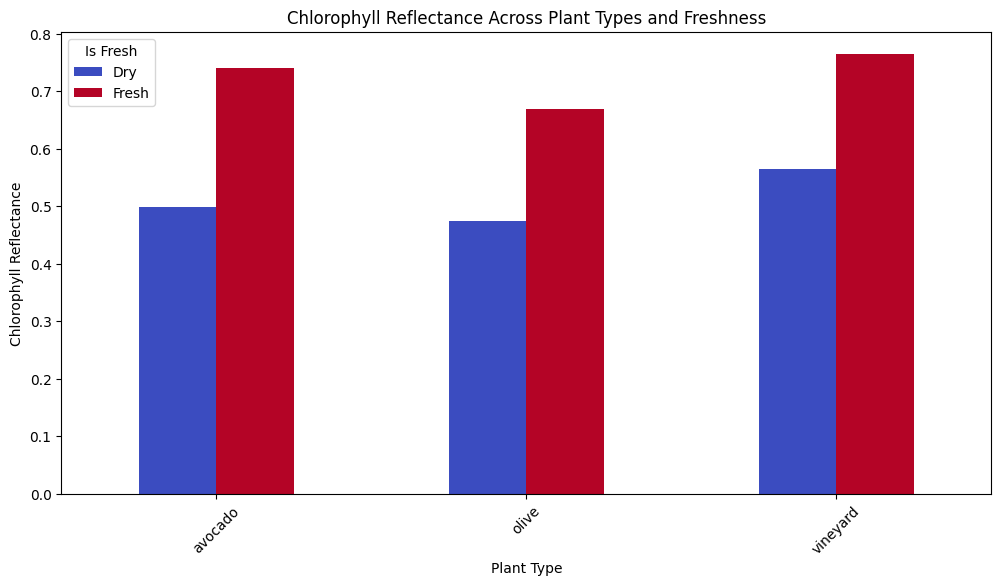

In [8]:
# Calculate Chlorophyll Content
data['Chlorophyll'] = (data['450'] + data['680']) / 2

# Group Chlorophyll Content by plant type and freshness
chlorophyll_means = data.groupby(['fruit_name', 'is_fresh'])['Chlorophyll'].mean().unstack()

# Plot chlorophyll comparison
chlorophyll_means.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Chlorophyll Reflectance Across Plant Types and Freshness')
plt.ylabel('Chlorophyll Reflectance')
plt.xlabel('Plant Type')
plt.xticks(rotation=45)
plt.legend(title='Is Fresh', labels=['Dry', 'Fresh'])
plt.show()


4. Nutrient Status Assessment<br>
Compare NIR reflectance (700–1400 nm) across fruits to assess nutrient status.

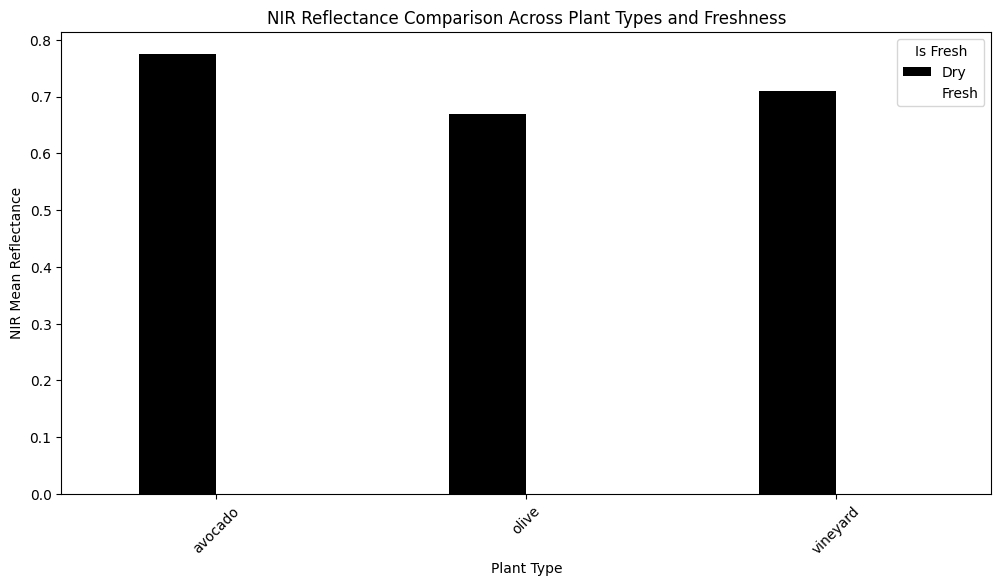

In [9]:
# Calculate NIR mean reflectance
nir_columns = [str(wavelength) for wavelength in range(700, 1401)]
data['NIR_Mean'] = data[nir_columns].mean(axis=1)

# Group NIR mean by fruit type and freshness
nir_means = data.groupby(['fruit_name', 'is_fresh'])['NIR_Mean'].mean().unstack()

# Plot NIR mean comparison
nir_means.plot(kind='bar', figsize=(12, 6), colormap='cubehelix')
plt.title('NIR Reflectance Comparison Across Plant Types and Freshness')
plt.ylabel('NIR Mean Reflectance')
plt.xlabel('Plant Type')
plt.xticks(rotation=45)
plt.legend(title='Is Fresh', labels=['Dry', 'Fresh'])
plt.show()


5. Stress Detection (Red Edge Analysis) <br>
Analyze the red edge slope (680–750 nm) for all fruits to detect stress.

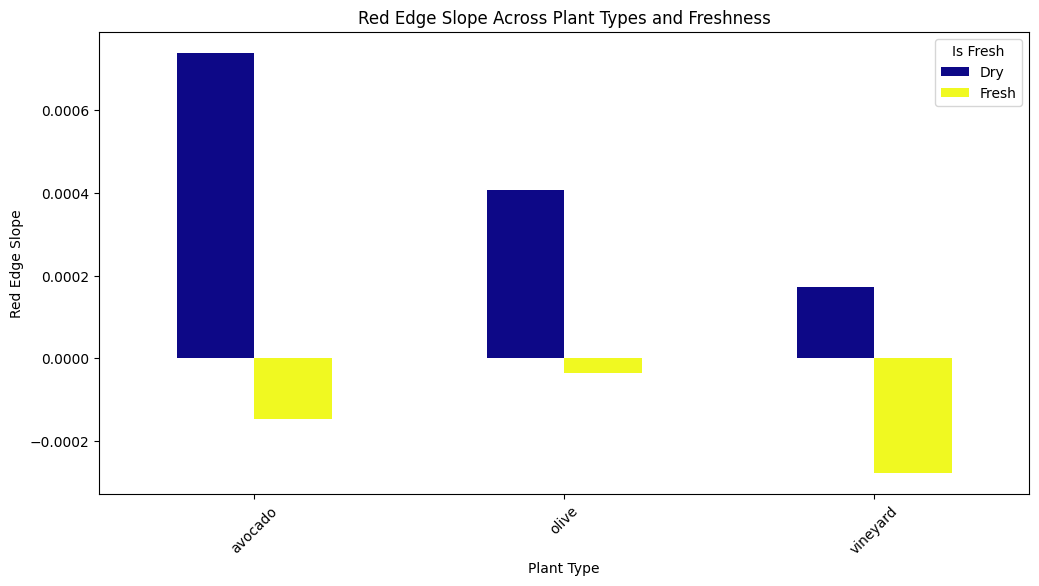

In [10]:
# Calculate Red Edge Slope
data['Red_Edge_Slope'] = (data['750'] - data['680']) / (750 - 680)

# Group Red Edge Slope by fruit type and freshness
red_edge_means = data.groupby(['fruit_name', 'is_fresh'])['Red_Edge_Slope'].mean().unstack()

# Plot red edge slope comparison
red_edge_means.plot(kind='bar', figsize=(12, 6), colormap='plasma')
plt.title('Red Edge Slope Across Plant Types and Freshness')
plt.ylabel('Red Edge Slope')
plt.xlabel('Plant Type')
plt.xticks(rotation=45)
plt.legend(title='Is Fresh', labels=['Dry', 'Fresh'])
plt.show()


6. Plant Chemical Composition <br>
Compare proxies for Cellulose (1200 nm), Lignin (1700 nm), and Starch (2100 nm) reflectance across plant types.

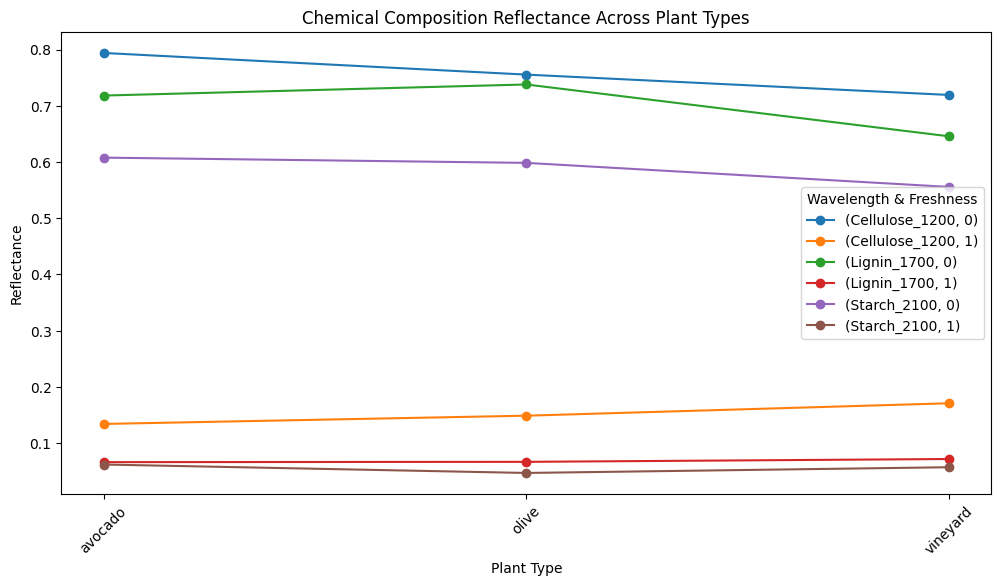

In [11]:
# Extract chemical composition bands
chemical_features = ['1200', '1700', '2100']
data['Cellulose_1200'] = data['1200']
data['Lignin_1700'] = data['1700']
data['Starch_2100'] = data['2100']

# Group chemical composition by plant type and freshness
chemical_means = data.groupby(['fruit_name', 'is_fresh'])[['Cellulose_1200', 'Lignin_1700', 'Starch_2100']].mean()

# Plot chemical composition comparison
chemical_means.unstack().plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Chemical Composition Reflectance Across Plant Types')
plt.ylabel('Reflectance')
plt.xlabel('Plant Type')
plt.xticks(range(len(data['fruit_name'].unique())), data['fruit_name'].unique(), rotation=45)
plt.legend(title='Wavelength & Freshness')
plt.show()


7. Overall Summary Heatmap<br>
Create a heatmap of the key metrics (NDVI, NIR, Chlorophyll, Red Edge, etc.) for each fruit.

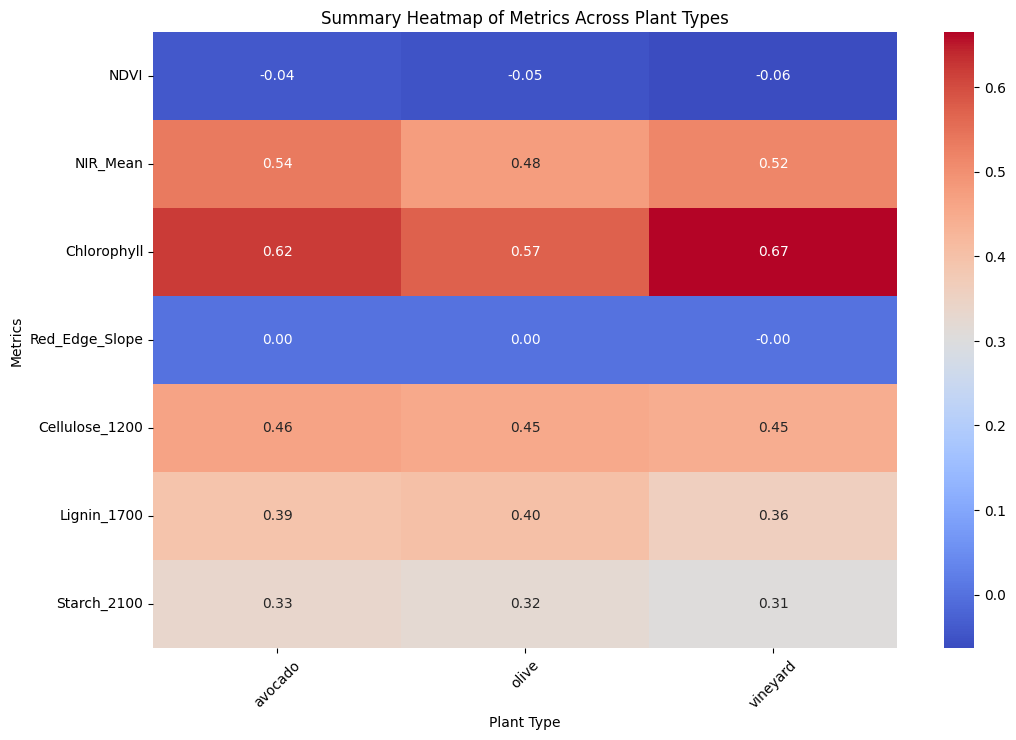

In [12]:
# Aggregate metrics for heatmap
summary_metrics = data.groupby('fruit_name').agg({
    'NDVI': 'mean',
    'NIR_Mean': 'mean',
    'Chlorophyll': 'mean',
    'Red_Edge_Slope': 'mean',
    'Cellulose_1200': 'mean',
    'Lignin_1700': 'mean',
    'Starch_2100': 'mean'
})

# Plot heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(summary_metrics.T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Summary Heatmap of Metrics Across Plant Types')
plt.ylabel('Metrics')
plt.xlabel('Plant Type')
plt.xticks(rotation=45)
plt.show()
